In [22]:
import pandas as pd
import os
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
def read_csvs(filename):

    root_log_path = os.path.join('..', 'cleaned_logs_to_keep', filename)

    log_jobs = pd.read_csv(os.path.join(root_log_path, 'log_jobs.csv'), sep=';', index_col=['Job ID'])
    log_rdds = pd.read_csv(os.path.join(root_log_path, 'log_rdds.csv'), sep=';', index_col=['RDD ID'])
    log_accumulables = pd.read_csv(os.path.join(root_log_path, 'log_accumulables.csv'), sep=';', index_col=['Accumulable ID', 'Task ID'])
    log_stages = pd.read_csv(os.path.join(root_log_path, 'log_stages.csv'), sep=';', index_col=['Stage ID'])
    log_tasks = pd.read_csv(os.path.join(root_log_path, 'log_tasks.csv'), sep=';', index_col=['Task ID'])
    
    return log_jobs, log_stages, log_tasks, log_rdds, log_accumulables

In [3]:
def plot_jobs_duration(log_jobs, filename, first_job_id=0):
    
    run_sorted = log_jobs.loc[0 + first_job_id:5 + first_job_id]
    run_min = log_jobs.loc[6 + first_job_id:11 + first_job_id]
    run_zip = log_jobs.loc[12 + first_job_id:17 + first_job_id]
    run_sorted.reset_index(inplace=True)
    run_min.reset_index(inplace=True)
    run_zip.reset_index(inplace=True)
    
    total_durations = {
        'sorted': sum(run_sorted['Duration']),
        'min': sum(run_min['Duration']),
        'zip': sum(run_zip['Duration'])
    }
    print(f"filename: {filename}, {total_durations}")
    
    run_sorted_rel = run_sorted.copy()
    run_min_rel = run_min.copy()
    run_zip_rel = run_zip.copy()
    for i in range(len(run_sorted_rel)):
        run_min_rel.loc[i, 'Duration'] /= run_sorted_rel.loc[i, 'Duration']
        run_zip_rel.loc[i, 'Duration'] /= run_sorted_rel.loc[i, 'Duration']
        run_sorted_rel.loc[i, 'Duration'] = 1
    
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
    abs_val_plt = ax[0]
    abs_val_plt.plot(run_sorted[['Duration']], label='sorted')
    abs_val_plt.plot(run_min[['Duration']], label='min')
    abs_val_plt.plot(run_zip[['Duration']], label='zip')
    abs_val_plt.set_title(f"Duration of each iteration per job for 3 alternative algorithms for file {filename}")
    abs_val_plt.set_xlabel("Iteration")
    abs_val_plt.set_ylabel("Duration (s)")
    abs_val_plt.legend()
    
    rel_val_plt = ax[1]
    rel_val_plt.plot(run_sorted_rel[['Duration']], label='sorted')
    rel_val_plt.plot(run_min_rel[['Duration']], label='min')
    rel_val_plt.plot(run_zip_rel[['Duration']], label='zip')
    rel_val_plt.set_title(f"Duration of each iteration per job for 3 alternative algorithms for file {filename}")
    rel_val_plt.set_xlabel("Iteration")
    rel_val_plt.set_ylabel("Duration (s)")
    rel_val_plt.legend()   
    
    plt.show()

In [27]:
def plot_stages_duration(log_stages, filename, first_job_id=0):
    
    run_sorted = log_stages.loc[(log_stages['Job ID'] <= 5 + first_job_id)]
    run_min = log_stages.loc[((log_stages['Job ID'] > 5 + first_job_id) & (log_stages['Job ID'] <= 11 + first_job_id))]
    run_zip = log_stages.loc[(log_stages['Job ID'] > 11 + first_job_id)]
    
    run_sorted.reset_index(inplace=True)
    run_min.reset_index(inplace=True)
    run_zip.reset_index(inplace=True)
    
    run_sorted_rel = run_sorted.copy()
    run_min_rel = run_min.copy()
    run_zip_rel = run_zip.copy()
    for i in range(len(run_sorted_rel)):
        run_min_rel.loc[i, 'Duration'] /= run_sorted_rel.loc[i, 'Duration']
        run_zip_rel.loc[i, 'Duration'] /= run_sorted_rel.loc[i, 'Duration']
        run_sorted_rel.loc[i, 'Duration'] = 1
    
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
    abs_val_plt = ax[0]
    abs_val_plt.plot(run_sorted[['Duration']], label='sorted')
    abs_val_plt.plot(run_min[['Duration']], label='min')
    abs_val_plt.plot(run_zip[['Duration']], label='zip')
    abs_val_plt.set_title(f"Duration of each iteration per job for 3 alternative algorithms for file {filename}")
    abs_val_plt.set_xlabel("Iteration")
    abs_val_plt.set_ylabel("Duration (s)")
    abs_val_plt.legend()
    
    rel_val_plt = ax[1]
    rel_val_plt.plot(run_sorted_rel[['Duration']], label='sorted')
    rel_val_plt.plot(run_min_rel[['Duration']], label='min')
    rel_val_plt.plot(run_zip_rel[['Duration']], label='zip')
    rel_val_plt.set_title(f"Duration of each iteration per stage for 3 alternative algorithms for file {filename}")
    rel_val_plt.set_xlabel("Iteration")
    rel_val_plt.set_ylabel("Duration (s)")
    rel_val_plt.legend()   
    
    plt.show()

In [28]:
def plot_tasks_duration(log_stages, log_tasks, filename, first_job_id=0):
    
    run_sorted_stages = log_stages.loc[(log_stages['Job ID'] <= 5 + first_job_id)]
    run_min_stages = log_stages.loc[((log_stages['Job ID'] > 5 + first_job_id) & (log_stages['Job ID'] <= 11 + first_job_id))]
    run_zip_stages = log_stages.loc[(log_stages['Job ID'] > 11 + first_job_id)]
    
    run_sorted_tasks = log_tasks.loc[(log_tasks['Stage ID'].isin(run_sorted_stages.index.values))]
    run_min_tasks = log_tasks.loc[(log_tasks['Stage ID'].isin(run_min_stages.index.values))]
    run_zip_tasks = log_tasks.loc[(log_tasks['Stage ID'].isin(run_zip_stages.index.values))]
    
    run_sorted_tasks.reset_index(inplace=True)
    run_min_tasks.reset_index(inplace=True)
    run_zip_tasks.reset_index(inplace=True)
    
    run_sorted_rel = run_sorted_tasks.copy()
    run_min_rel = run_min_tasks.copy()
    run_zip_rel = run_zip_tasks.copy()
    for i in range(len(run_sorted_rel)):
        run_min_rel.loc[i, 'Duration'] /= run_sorted_rel.loc[i, 'Duration']
        run_zip_rel.loc[i, 'Duration'] /= run_sorted_rel.loc[i, 'Duration']
        run_sorted_rel.loc[i, 'Duration'] = 1
    
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
    abs_val_plt = ax[0]
    abs_val_plt.plot(run_sorted_tasks[['Duration']], label='sorted')
    abs_val_plt.plot(run_min_tasks[['Duration']], label='min')
    abs_val_plt.plot(run_zip_tasks[['Duration']], label='zip')
    abs_val_plt.set_title(f"Duration of each iteration per job for 3 alternative algorithms for file {filename}")
    abs_val_plt.set_xlabel("Iteration")
    abs_val_plt.set_ylabel("Duration (s)")
    abs_val_plt.legend()
    
    rel_val_plt = ax[1]
    rel_val_plt.plot(run_sorted_rel[['Duration']], label='sorted')
    rel_val_plt.plot(run_min_rel[['Duration']], label='min')
    rel_val_plt.plot(run_zip_rel[['Duration']], label='zip')
    rel_val_plt.set_title(f"Duration of each iteration per stage for 3 alternative algorithms for file {filename}")
    rel_val_plt.set_xlabel("Iteration")
    rel_val_plt.set_ylabel("Duration (s)")
    rel_val_plt.legend()   
    
    plt.show()

In [29]:
filenames = ['graph_5M.txt', 'graph_15M.txt']

filename: graph_5M.txt, {'sorted': 117.78499999999998, 'min': 108.76599999999999, 'zip': 106.537}


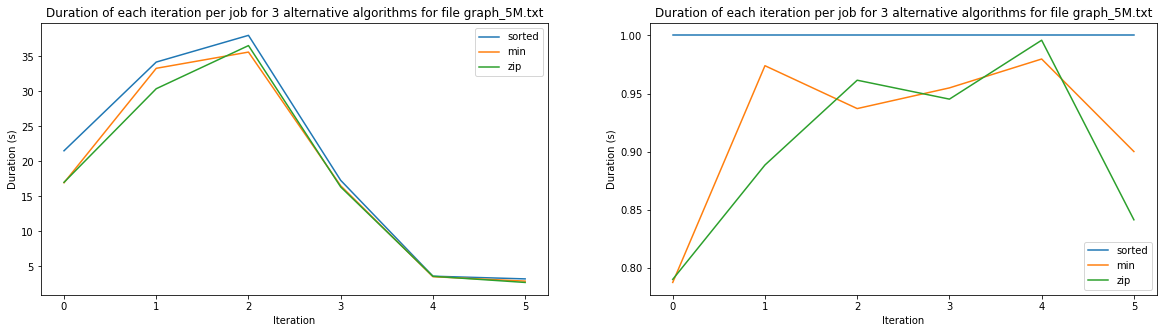

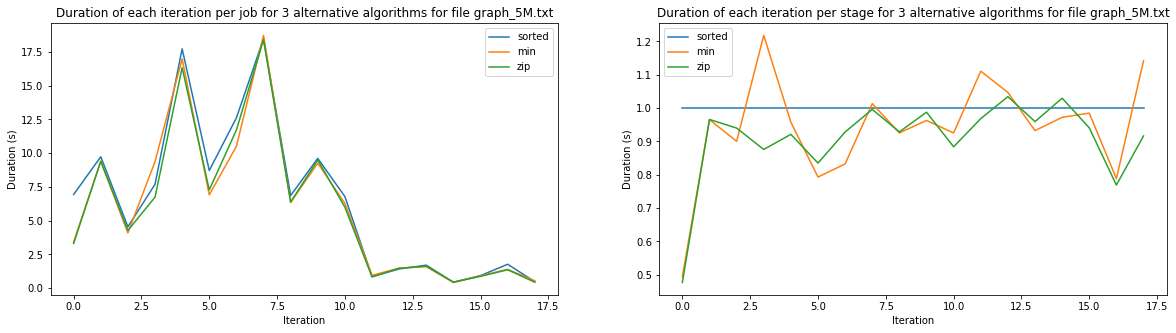

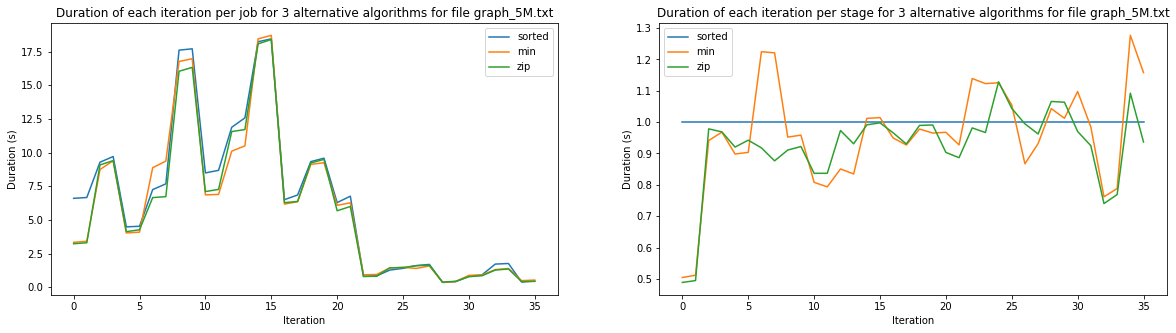

filename: graph_15M.txt, {'sorted': 694.973, 'min': 671.8389999999999, 'zip': 673.4810000000001}


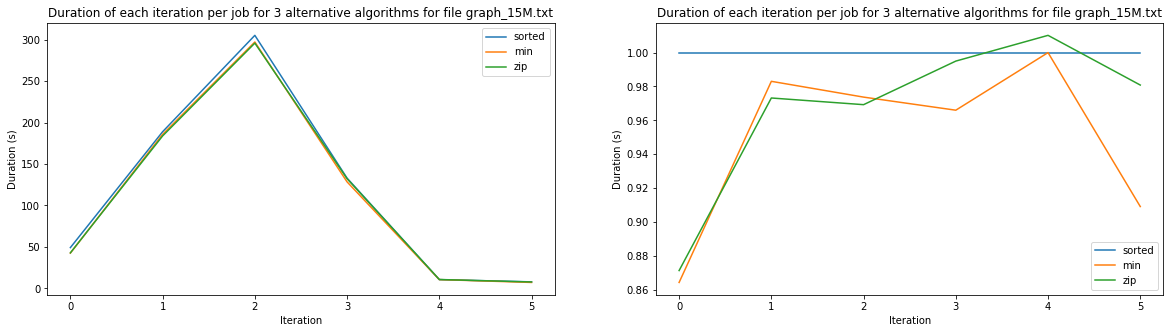

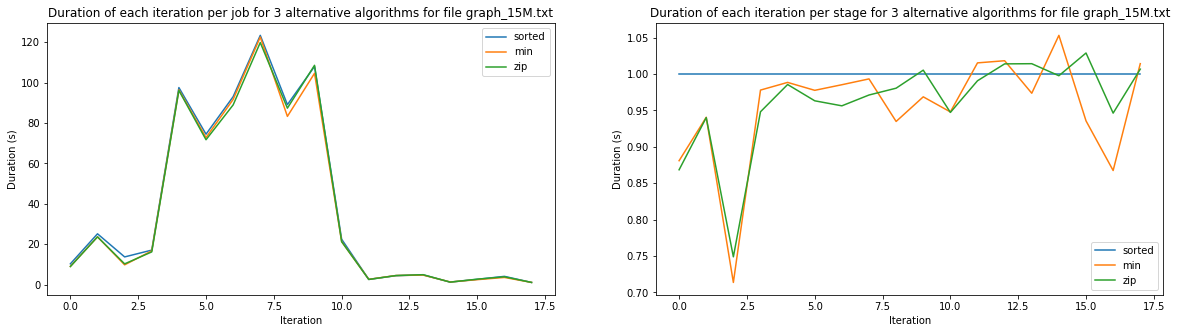

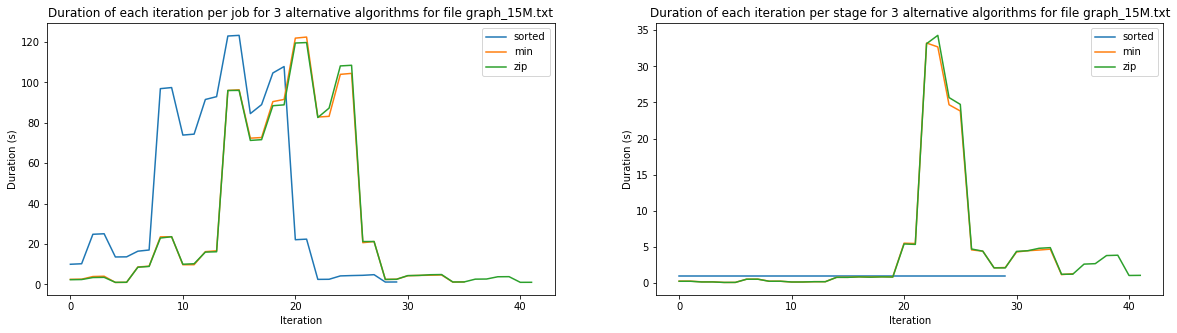

In [30]:
log_jobs, log_stages, log_tasks, log_rdds, log_accumulables = read_csvs('graph_5M.txt')
plot_jobs_duration(log_jobs, 'graph_5M.txt', first_job_id=0)
plot_stages_duration(log_stages, 'graph_5M.txt', first_job_id=0)
plot_tasks_duration(log_stages, log_tasks, 'graph_5M.txt', first_job_id=0)

log_jobs, log_stages, log_tasks, log_rdds, log_accumulables = read_csvs('graph_15M.txt')
plot_jobs_duration(log_jobs, 'graph_15M.txt', first_job_id=1)
plot_stages_duration(log_stages, 'graph_15M.txt', first_job_id=1)
plot_tasks_duration(log_stages, log_tasks, 'graph_15M.txt', first_job_id=0)

filename: graph_25M.txt, {'sorted': 1197, 'min': 1221, 'zip': 1246}


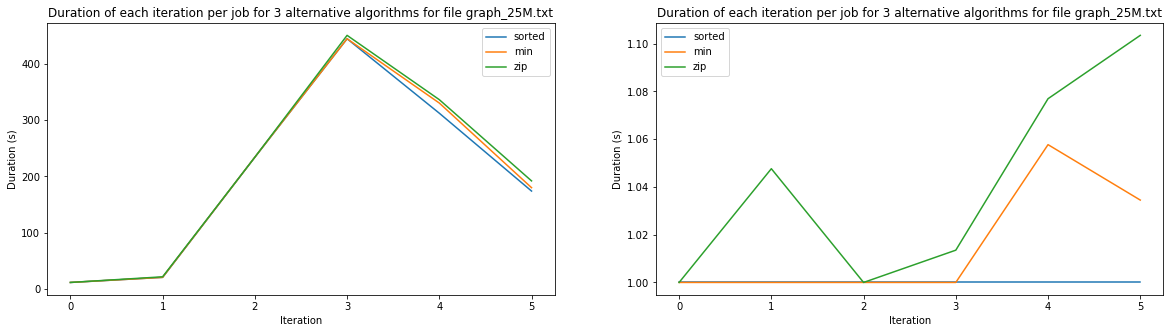

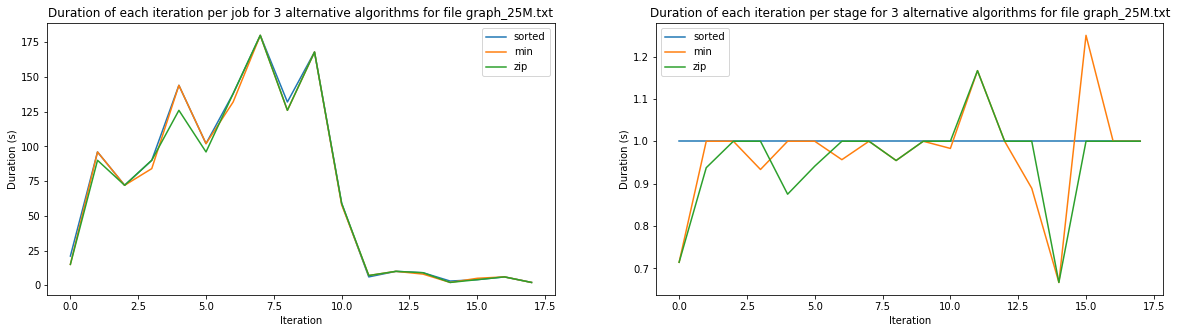

In [31]:
log_stages = pd.read_csv(os.path.join('..', 'cleaned_logs_to_keep', 'graph_25M.txt', 'logs_stages.csv'), sep=';')
log_jobs = pd.read_csv(os.path.join('..', 'cleaned_logs_to_keep', 'graph_25M.txt', 'logs_jobs.csv'), sep=';')

plot_jobs_duration(log_jobs, 'graph_25M.txt', first_job_id=0)
plot_stages_duration(log_stages, 'graph_25M.txt', first_job_id=0)

In [23]:
comparison = pd.read_csv(os.path.join('..', 'cleaned_logs_to_keep', 'comparison_5_15_25.csv'))

In [24]:
five_M = comparison[comparison['filename'] == '../data/graph_5M.txt']
fifteen_M = comparison[comparison['filename'] == '../data/graph_15M.txt']
twenty_five_M = comparison[comparison['filename'] == '../data/graph_25M.txt']

five_M.reset_index(inplace=True)
fifteen_M.reset_index(inplace=True)
twenty_five_M.reset_index(inplace=True)

five_M.drop(['index'], axis=1, inplace=True)
fifteen_M.drop(['index'], axis=1, inplace=True)
twenty_five_M.drop(['index'], axis=1, inplace=True)

five_M['end_of_command'] = pd.to_datetime(five_M['end_of_command'])
fifteen_M['end_of_command'] = pd.to_datetime(fifteen_M['end_of_command'])
twenty_five_M['end_of_command'] = pd.to_datetime(twenty_five_M['end_of_command'])

In [25]:
five_M['duration'] = five_M['end_of_command'].diff().dt.total_seconds()
fifteen_M['duration'] = fifteen_M['end_of_command'].diff().dt.total_seconds()
twenty_five_M['duration'] = twenty_five_M['end_of_command'].diff().dt.total_seconds()

In [36]:
five_M.head()

,filename,algo_type,loop_counter,command,end_of_command,accum,duration
0,../data/graph_5M.txt,sorted,0,start,2021-03-16 18:41:32.740990,0,0.000000
1,../data/graph_5M.txt,sorted,1,it_map,2021-03-16 18:41:36.198681,0,3.457691
2,../data/graph_5M.txt,sorted,1,it_groupby,2021-03-16 18:41:40.967153,0,4.768472
3,../data/graph_5M.txt,sorted,1,it_reduce,2021-03-16 18:41:43.039086,731131,2.071933
4,../data/graph_5M.txt,sorted,1,ded_map,2021-03-16 18:41:45.704459,1462262,2.665373


In [51]:
def plot_comparison(df):
    
    def plot_line(filename, abs_val_plt, rel_val_plt, run_sorted, run_min, run_zip, run_sorted_rel, run_min_rel, run_zip_rel):
        
        abs_val_plt.plot(run_sorted[['duration']], label='sorted')
        abs_val_plt.plot(run_min[['duration']], label='min')
        abs_val_plt.plot(run_zip[['duration']], label='zip')
        abs_val_plt.set_title(f"uration of each iteration per job for 3 alternative algorithms for file {filename}")
        abs_val_plt.set_xlabel("Iteration")
        abs_val_plt.set_ylabel("Duration (s)")
        abs_val_plt.legend()
        
        rel_val_plt.plot(run_sorted_rel[['duration']], label='sorted')
        rel_val_plt.plot(run_min_rel[['duration']], label='min')
        rel_val_plt.plot(run_zip_rel[['duration']], label='zip')
        rel_val_plt.set_title(f"Duration of each iteration per job for 3 alternative algorithms for file {filename}")
        rel_val_plt.set_xlabel("Iteration")
        rel_val_plt.set_ylabel("Duration (s)")
        rel_val_plt.legend()   
        
        
    
    df['duration'].fillna(0, inplace=True)
    run_sorted = df[df['algo_type'] == 'sorted']
    run_min = df[df['algo_type'] == 'min']
    run_zip = df[df['algo_type'] == 'zip']
    
    run_sorted.reset_index(inplace=True)
    run_min.reset_index(inplace=True)
    run_zip.reset_index(inplace=True)
    
    total_durations = {
        'sorted': sum(run_sorted['duration']),
        'min': sum(run_min['duration']),
        'zip': sum(run_zip['duration'])
    }
    print(f"filename: {df.loc[0, 'filename']}, {total_durations}")
    
    run_sorted_rel = run_sorted.copy()
    run_min_rel = run_min.copy()
    run_zip_rel = run_zip.copy()
    for i in range(len(run_sorted_rel)):
        run_min_rel.loc[i, 'duration'] /= run_sorted_rel.loc[i, 'duration']
        run_zip_rel.loc[i, 'duration'] /= run_sorted_rel.loc[i, 'duration']
        run_sorted_rel.loc[i, 'duration'] = 1
    
    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
    abs_val_plt = ax[0][0]    
    rel_val_plt = ax[0][1]
    plot_line(df.loc[0, 'filename'], abs_val_plt, rel_val_plt, run_sorted, run_min, run_zip, run_sorted_rel, run_min_rel, run_zip_rel)
    
    run_sorted = run_sorted.groupby(by='loop_counter').sum()
    run_min = run_min.groupby(by='loop_counter').sum()
    run_zip = run_zip.groupby(by='loop_counter').sum()
    run_sorted_rel = run_sorted_rel.groupby(by='loop_counter').sum()
    run_min_rel = run_min_rel.groupby(by='loop_counter').sum()
    run_zip_rel = run_zip_rel.groupby(by='loop_counter').sum()
    run_sorted_rel.drop(0, axis=0, inplace=True)
    abs_val_plt = ax[1][0]    
    rel_val_plt = ax[1][1]
    plot_line(df.loc[0, 'filename'], abs_val_plt, rel_val_plt, run_sorted, run_min, run_zip, run_sorted_rel, run_min_rel, run_zip_rel)
      
    plt.show()   

filename: ../data/graph_5M.txt, {'sorted': 156.85841800000006, 'min': 163.942013, 'zip': 145.25958399999996}


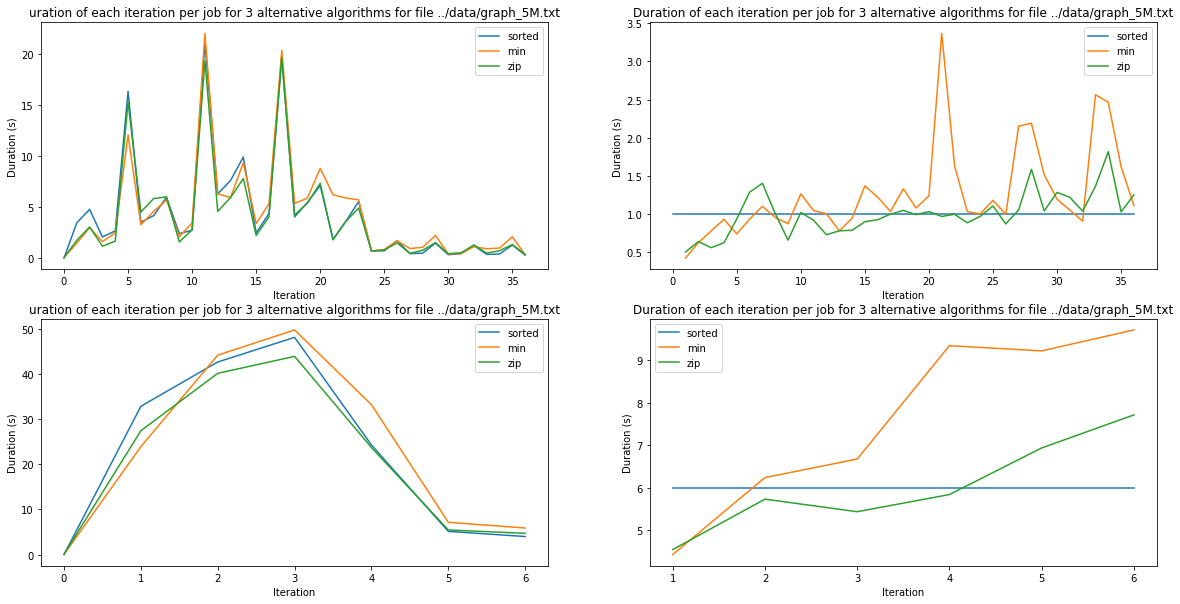

In [52]:
plot_comparison(five_M)

filename: ../data/graph_15M.txt, {'sorted': 1045.2373640000003, 'min': 1043.6854280000002, 'zip': 987.1836530000002}


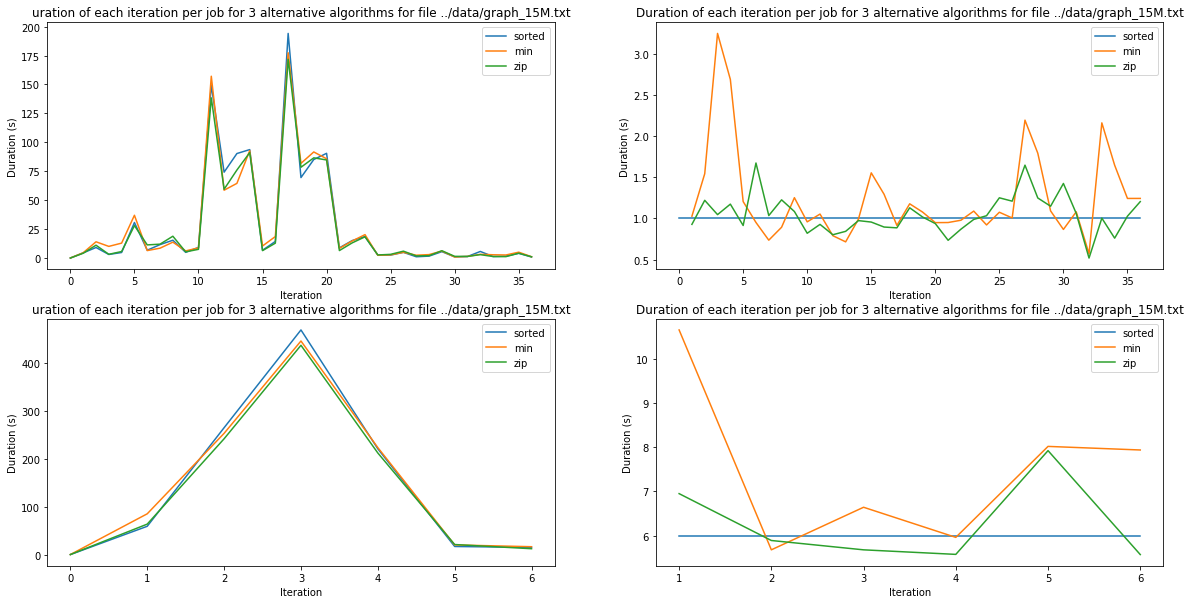

In [53]:
plot_comparison(fifteen_M)

filename: ../data/graph_25M.txt, {'sorted': 1836.3083770000003, 'min': 1741.777326, 'zip': 1747.3300720000002}


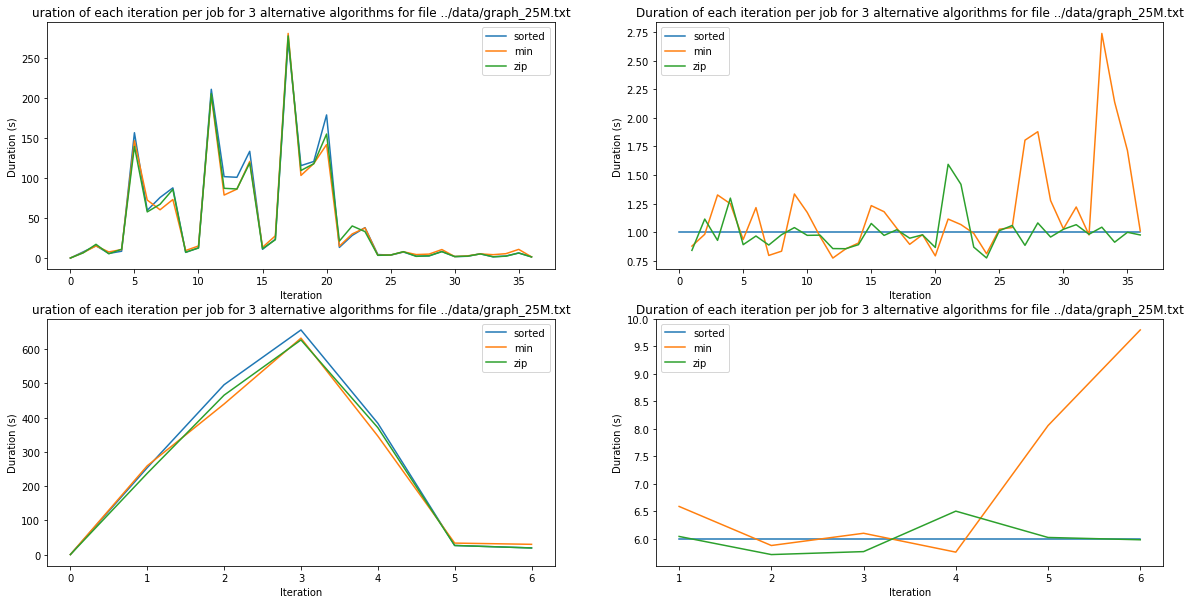

In [54]:
plot_comparison(twenty_five_M)